In [1]:
# Basic packages
import numpy as np
import pandas as pd
import math
from termcolor import colored as cl

# Visualization
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import export_graphviz
import seaborn as sns
from pyecharts import options as opts
from pyecharts.charts import Liquid
style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (20,10)
sns.set_style("white")
%matplotlib inline

In [2]:
df1 = pd.read_csv(r'C:\Users\Jason\Desktop\MATH3710 Midterm\M3710_Midterm_Project\12-8 Sown Area od Farm Crops (Region).csv')
df1.head(5)

,Region,Region_CN,Total Sown Area,Sown Area of Grain Crops,Cotton,Oil-bearing Crops,Fiber Crops,Sugar Crops,Tobacco,Vegetables,Tea Plantations,Orchards
0,Beijing,北 京,88.6,46.5,0.0,1.2,NaN,NaN,0.0,30.1,NaN,43.8
1,Tianjin,天 津,410.3,339.3,14.1,1.1,NaN,NaN,NaN,48.3,NaN,26.6
2,Hebei,河 北,8132.7,6469.2,203.9,364.5,0.0,12.4,1.4,794.6,0.0,506.0
3,Shanxi,山 西,3524.4,3126.2,2.3,99.8,0.1,0.0,1.3,180.4,0.2,374.9
4,Neimenggu,内蒙古,8885.0,6827.5,0.1,930.9,1.2,127.4,1.1,200.5,NaN,97.5


# Basic Informtion Checking

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Region                    31 non-null     object 
 1   Region_CN                 31 non-null     object 
 2   Total Sown Area           31 non-null     float64
 3   Sown Area of Grain Crops  31 non-null     float64
 4   Cotton                    23 non-null     float64
 5   Oil-bearing Crops         31 non-null     float64
 6   Fiber Crops               25 non-null     float64
 7   Sugar Crops               27 non-null     float64
 8   Tobacco                   26 non-null     float64
 9   Vegetables                31 non-null     float64
 10  Tea Plantations           22 non-null     float64
 11  Orchards                  31 non-null     float64
dtypes: float64(10), object(2)
memory usage: 3.0+ KB


In [4]:
df1.describe()

,Total Sown Area,Sown Area of Grain Crops,Cotton,Oil-bearing Crops,Fiber Crops,Sugar Crops,Tobacco,Vegetables,Tea Plantations,Orchards
count,31.000000,31.000000,23.000000,31.000000,25.000000,27.000000,26.000000,31.000000,22.000000,31.000000
mean,5352.609677,3743.983871,145.186957,416.948387,2.636000,59.640741,39.480769,672.990323,141.127273,396.022581
std,4024.078802,3361.287388,525.591112,452.864203,5.195421,176.154293,83.119124,560.421858,153.590535,353.996740
min,88.600000,46.500000,0.000000,1.100000,0.000000,0.000000,0.000000,25.800000,0.000000,5.400000
25%,1799.450000,899.900000,0.250000,88.650000,0.100000,1.750000,1.325000,163.750000,15.500000,100.250000
50%,5481.600000,2998.900000,5.600000,283.200000,0.900000,6.500000,10.050000,579.800000,93.200000,344.100000
75%,7969.350000,5513.200000,51.500000,563.150000,2.600000,13.200000,34.225000,1285.550000,197.825000,560.600000
max,14770.100000,14338.100000,2540.500000,1533.900000,21.300000,890.200000,409.400000,1732.900000,480.900000,1331.900000


In [5]:
df1.isnull().sum()

Region                      0
Region_CN                   0
Total Sown Area             0
Sown Area of Grain Crops    0
Cotton                      8
Oil-bearing Crops           0
Fiber Crops                 6
Sugar Crops                 4
Tobacco                     5
Vegetables                  0
Tea Plantations             9
Orchards                    0
dtype: int64

# Data Preprocessing

Fill null value with 0

In [6]:
df1['Cotton'] = df1['Cotton'].replace({np.NaN:0})
df1['Fiber Crops'] = df1['Fiber Crops'].replace({np.NaN:0})
df1['Sugar Crops'] = df1['Sugar Crops'].replace({np.NaN:0})
df1['Tobacco'] = df1['Tobacco'].replace({np.NaN:0})
df1['Tea Plantations'] = df1['Tea Plantations'].replace({np.NaN:0})
df1.isnull().sum()

Region                      0
Region_CN                   0
Total Sown Area             0
Sown Area of Grain Crops    0
Cotton                      0
Oil-bearing Crops           0
Fiber Crops                 0
Sugar Crops                 0
Tobacco                     0
Vegetables                  0
Tea Plantations             0
Orchards                    0
dtype: int64

Classes Mapping

In [7]:
# Classes_Mapping
region_mapping = {  
            'Beijing': 1,
            'Tianjin': 1,
            'Hebei': 1,
            'Shanxi': 1,
            'Neimenggu': 1,   
            'Liaoning': 2,
            'Jilin': 2,
            'Heilongjiang': 2,  
            'Shanghai': 3,
            'Jiangsu': 3,
            'Zhejiang': 3,
            'Anhui': 3,
            'Fujian': 3,
            'Jiangxi': 3,
            'Shandong': 3,
            'Henan': 4,
            'Hubei': 4,
            'Hunan': 4,
            'Guangxi': 4, 
            'Guangdong': 4, 
            'Hainan': 4,
            'Chongqin': 5,
            'Sichuan': 5,
            'Guizhou': 5,
            'Yunnan': 5,
            'Xizang': 5,
            'Shanxi_': 6,
            'Gansu': 6,
            'Qinghai': 6,
            'Ningxia': 6,
            'Xinjiang': 6}  
df1['Region'] = df1['Region'].map(region_mapping)
df1.head(5)

,Region,Region_CN,Total Sown Area,Sown Area of Grain Crops,Cotton,Oil-bearing Crops,Fiber Crops,Sugar Crops,Tobacco,Vegetables,Tea Plantations,Orchards
0,1,北 京,88.6,46.5,0.0,1.2,0.0,0.0,0.0,30.1,0.0,43.8
1,1,天 津,410.3,339.3,14.1,1.1,0.0,0.0,0.0,48.3,0.0,26.6
2,1,河 北,8132.7,6469.2,203.9,364.5,0.0,12.4,1.4,794.6,0.0,506.0
3,1,山 西,3524.4,3126.2,2.3,99.8,0.1,0.0,1.3,180.4,0.2,374.9
4,1,内蒙古,8885.0,6827.5,0.1,930.9,1.2,127.4,1.1,200.5,0.0,97.5


In [8]:
df1 = df1[['Region','Total Sown Area', 'Sown Area of Grain Crops','Cotton','Oil-bearing Crops','Fiber Crops',
                'Sugar Crops', 'Tobacco', 'Vegetables', 'Tea Plantations','Orchards']] # Choose certain columns
df2 = df1.copy(deep=True)
df1.head(5)

,Region,Total Sown Area,Sown Area of Grain Crops,Cotton,Oil-bearing Crops,Fiber Crops,Sugar Crops,Tobacco,Vegetables,Tea Plantations,Orchards
0,1,88.6,46.5,0.0,1.2,0.0,0.0,0.0,30.1,0.0,43.8
1,1,410.3,339.3,14.1,1.1,0.0,0.0,0.0,48.3,0.0,26.6
2,1,8132.7,6469.2,203.9,364.5,0.0,12.4,1.4,794.6,0.0,506.0
3,1,3524.4,3126.2,2.3,99.8,0.1,0.0,1.3,180.4,0.2,374.9
4,1,8885.0,6827.5,0.1,930.9,1.2,127.4,1.1,200.5,0.0,97.5


In [9]:
# Classes_Mapping
RegionEN_mapping = {  
            1: 'North Region',
            2: 'Northeast Region',
            3: 'East Region',
            4: 'Central South Region',
            5: 'Southwest Region',
            6: 'Northwest region'}  
df1['Region'] = df1['Region'].map(RegionEN_mapping)
df3 = df1.copy(deep=True)
df1

,Region,Total Sown Area,Sown Area of Grain Crops,Cotton,Oil-bearing Crops,Fiber Crops,Sugar Crops,Tobacco,Vegetables,Tea Plantations,Orchards
0,North Region,88.6,46.5,0.0,1.2,0.0,0.0,0.0,30.1,0.0,43.8
1,North Region,410.3,339.3,14.1,1.1,0.0,0.0,0.0,48.3,0.0,26.6
2,North Region,8132.7,6469.2,203.9,364.5,0.0,12.4,1.4,794.6,0.0,506.0
3,North Region,3524.4,3126.2,2.3,99.8,0.1,0.0,1.3,180.4,0.2,374.9
4,North Region,8885.0,6827.5,0.1,930.9,1.2,127.4,1.1,200.5,0.0,97.5
5,Northeast Region,4217.1,3488.7,0.0,293.5,0.0,2.4,5.0,312.1,0.0,352.7
6,Northeast Region,6117.1,5644.9,0.0,257.4,0.1,0.9,8.5,121.5,0.0,26.5
7,Northeast Region,14770.1,14338.1,0.0,51.6,21.3,8.9,10.0,147.1,0.0,29.7
8,East Region,261.4,117.4,0.1,2.8,0.0,0.1,0.0,86.8,0.1,13.4
9,East Region,7442.6,5381.5,11.6,283.2,0.2,3.6,0.0,1424.5,33.8,199.5


In [12]:
d = pd.read_csv(r'C:\Users\Jason\Desktop\MATH3710 Midterm\M3710_Midterm_Project\12-3 Gross Output Value of Agriculture, Forestry, Animal Husbandry (Year).csv')
d.head(5)

,Year,Gross Output Value(100 million yuan),Farming,Forestry,Animal Husbandry,Fishery,Indices of Gross Output (preceding year=100),Farming.1,Forestry.1,Animal Husbandry.1,Fishery.1
0,2005,39450.9,19613.4,1425.5,13310.8,4016.1,105.7,104.1,103.2,107.8,106.5
1,2006,40810.8,21522.3,1610.8,12083.9,3970.5,105.4,105.4,105.6,105.0,106.0
2,2007,48651.8,24444.7,1889.9,16068.6,4427.9,103.9,103.7,109.8,103.2,104.0
3,2008,57420.8,27679.9,2180.3,20354.2,5137.5,105.6,104.6,108.0,106.7,105.8
4,2009,59311.3,29983.8,2324.4,19184.6,5514.7,104.6,103.4,106.7,105.5,105.6


In [22]:
d["Region"] = 'Nation'
d.head(5)

,Year,Gross Output Value(100 million yuan),Farming,Forestry,Animal Husbandry,Fishery,Indices of Gross Output (preceding year=100),Farming.1,Forestry.1,Animal Husbandry.1,Fishery.1,Region
0,2005,39450.9,19613.4,1425.5,13310.8,4016.1,105.7,104.1,103.2,107.8,106.5,Nation
1,2006,40810.8,21522.3,1610.8,12083.9,3970.5,105.4,105.4,105.6,105.0,106.0,Nation
2,2007,48651.8,24444.7,1889.9,16068.6,4427.9,103.9,103.7,109.8,103.2,104.0,Nation
3,2008,57420.8,27679.9,2180.3,20354.2,5137.5,105.6,104.6,108.0,106.7,105.8,Nation
4,2009,59311.3,29983.8,2324.4,19184.6,5514.7,104.6,103.4,106.7,105.5,105.6,Nation


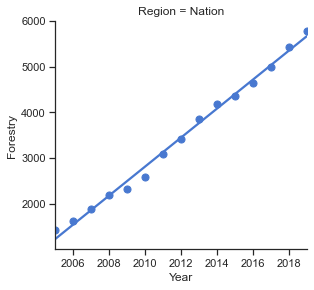

In [25]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="Year", y="Forestry", col="Region", hue="Region", data=d,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1});

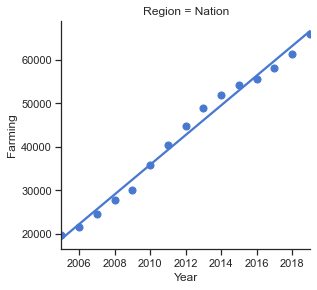

In [26]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="Year", y="Farming", col="Region", hue="Region", data=d,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1});

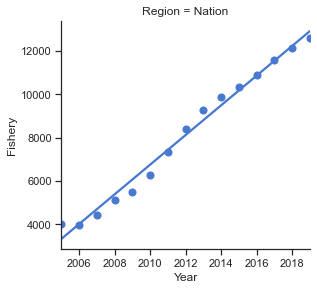

In [27]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="Year", y="Fishery", col="Region", hue="Region", data=d,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1});

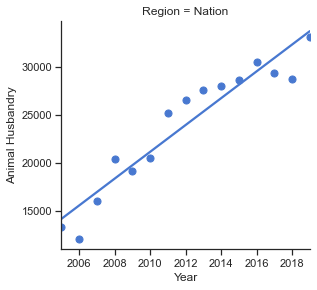

In [28]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="Year", y="Animal Husbandry", col="Region", hue="Region", data=d,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1});

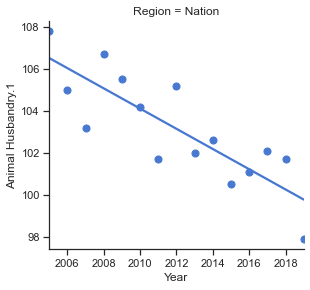

In [35]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="Year", y="Animal Husbandry.1", col="Region", hue="Region", data=d,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1});

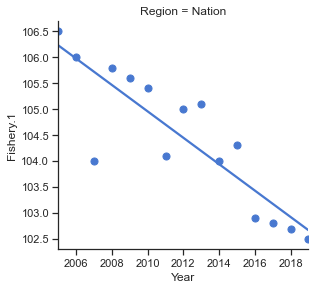

In [36]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="Year", y="Fishery.1", col="Region", hue="Region", data=d,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1});

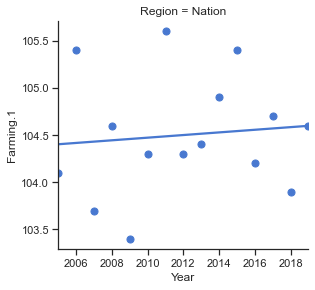

In [37]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="Year", y="Farming.1", col="Region", hue="Region", data=d,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1});

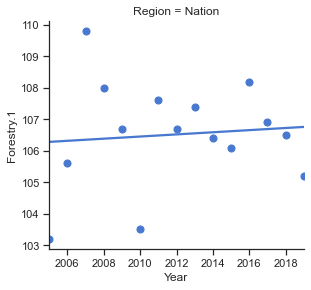

In [38]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="Year", y="Forestry.1", col="Region", hue="Region", data=d,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1});